In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Data Load

In [100]:
#Loading the dataset
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Here we find the shape of the data set
df.shape

(13320, 9)

In [4]:
#Find the different columns in the data set
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#Get the information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#Get the unique area type
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
#Get the how many time they are repeating
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

**Drop feature which are not required**

In [8]:
df1 = df.drop(['area_type','society','balcony','availability'],axis =1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df1.shape

(13320, 5)

#Data Cleaning : Handling NA Values

In [10]:
#Check the total null values in data set
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
#Drop the null values in the data set
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df2.shape

(13246, 5)

#Feature Enginerring


---

**Add new feature(integer) for bhk**

In [13]:
#Here in size column we get the bhk but there are some text which was not required so we split the size column and create new bhk column
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))#iterate to each row and split the data
df2.bhk.unique()

<ipython-input-13-90ccf958656b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

**Explore the total_sqft feature**

In [14]:
#Here we want to find that in total_sqft column all the data are in folat or in Range type so we give True to all single folat value else False
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [15]:
#Here we pass to the function and get the range type data
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
#We will split and take an avg of those data
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0]) + float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head()
df3.shape

(13200, 6)

In [18]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

#Feature Enginerring


---



**Add New Feature called price per sqft**

In [19]:
#Here we created new column where we find the price per sqft
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Examine the location which is a categorical variable.We need to apply dimensionality reduction technique here to reduce no of locations**

In [21]:
df4.locations = df4.location.apply(lambda x : x.strip())#There are some spaces around the String so we remove it
locations_stats = df4['location'].value_counts(ascending = False)
locations_stats

<ipython-input-21-bd922f37787f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df4.locations = df4.location.apply(lambda x : x.strip())


location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [22]:
locations_stats.values.sum()

13200

In [23]:
#Here we check how many location stats are greater than 10
len(locations_stats[locations_stats>10])

240

In [24]:
len(locations_stats)

1298

In [25]:
#Here we find that location count are less than 10 was too much so we have to do something for it
len(locations_stats[locations_stats<=10])

1058

#Dimensionality Reduction


---

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**


In [26]:
#Get the locations which has a count less than 10
locations_stats_less_than_10 = locations_stats[locations_stats<=10]
locations_stats_less_than_10

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: count, Length: 1058, dtype: int64

In [27]:
len(df4.location.unique())

1298

In [28]:
#We will say all the location as other if it is in less than 10
df4.location = df4.location.apply(lambda x : 'other' if x in locations_stats_less_than_10 else x)
len(df4.location.unique())

241

In [29]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#Outlier Removal Using Business Login

In [101]:
#Here we take a sample that total_sqft to bhk less than 300 then there is some error (Because it is minimum sqare feet)
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df4.shape

(13200, 7)

In [32]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

#Outlier Removal Using Standard Deviation and Mean


In [33]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [34]:
#This function will remove price_per_sqare_feet outliers
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)#After grouping by location we will find the mean of it
    std = np.std(subdf.price_per_sqft)#After grouping by location we will find the standard Deviation of it
    reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))] #70%Value will be covered it is like normal distribution
    df_out = pd.concat([df_out,reduced_df],ignore_index = True)
  return df_out

df6 = remove_pps_outliers(df5)
df6.shape


(10245, 7)

In [35]:
df6.price_per_sqft.describe()

count    10245.000000
mean      5657.835532
std       2266.165749
min       1250.000000
25%       4244.762955
50%       5173.279759
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**



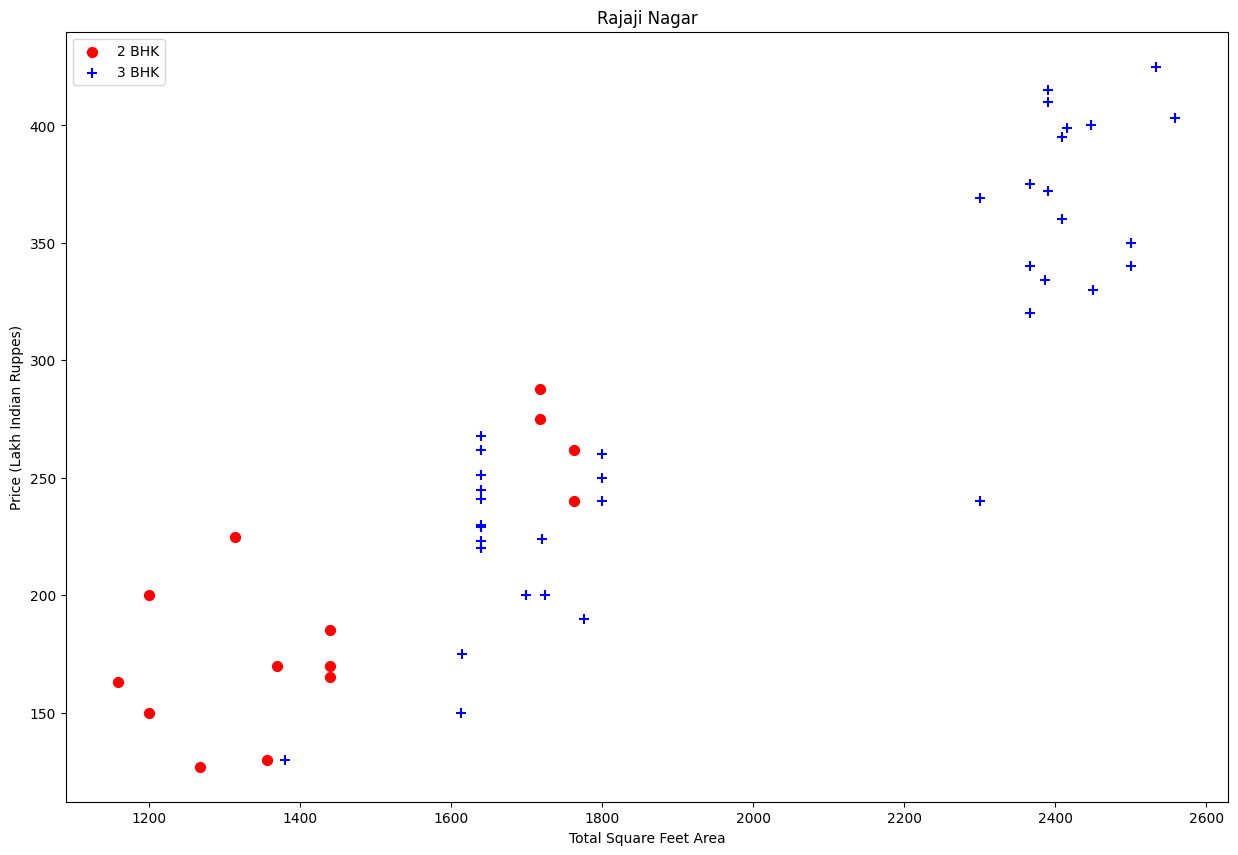

In [36]:
#This Function will check the location and bhk
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location == location) & (df.bhk ==2)]
  bhk3 = df[(df.location == location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10) # rc = runtime Configuration (Default size if we want to set)
  plt.scatter(bhk2.total_sqft,bhk2.price,color = 'red',label = '2 BHK',s = 50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color = 'blue',label = '3 BHK',marker = '+',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price (Lakh Indian Ruppes)")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df6,"Rajaji Nagar")

**We should remove properties where for same location the price of 3 bedroom apartment is less than 2 bedroom apartment**


In [40]:
#If the price of the 2bhk are less than the 1 bhk apartment for same area then it will mostly be outlier so we remove it
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):#Grouping by location
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):#After grouping by location for each locatiion group the bhks
      bhk_stats[bhk] = {#For each bhk find the mean,std,count of it
          'mean' : np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)#For bhk less than 1 we get the stats
      if stats and stats['count']>5:#If it is more than 5 times then we exclude it
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(7331, 7)

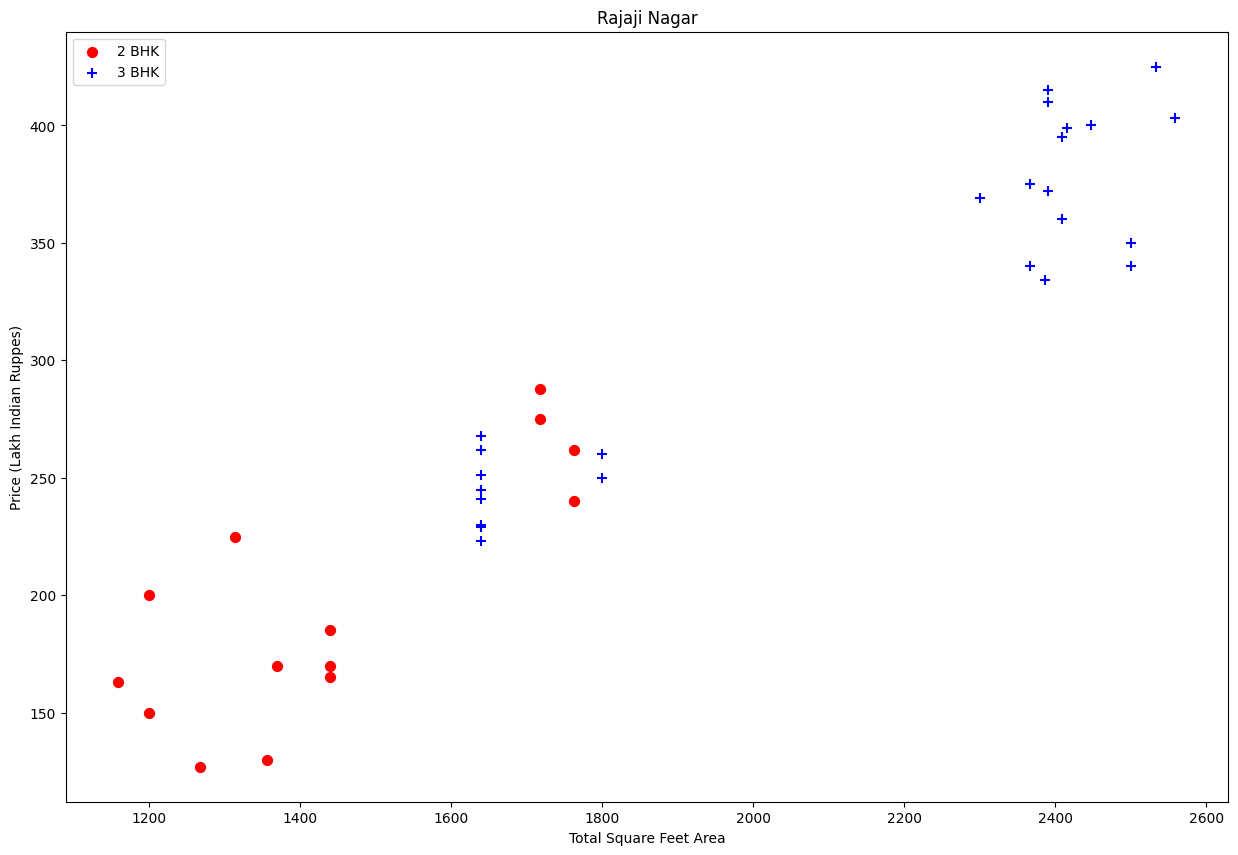

In [38]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

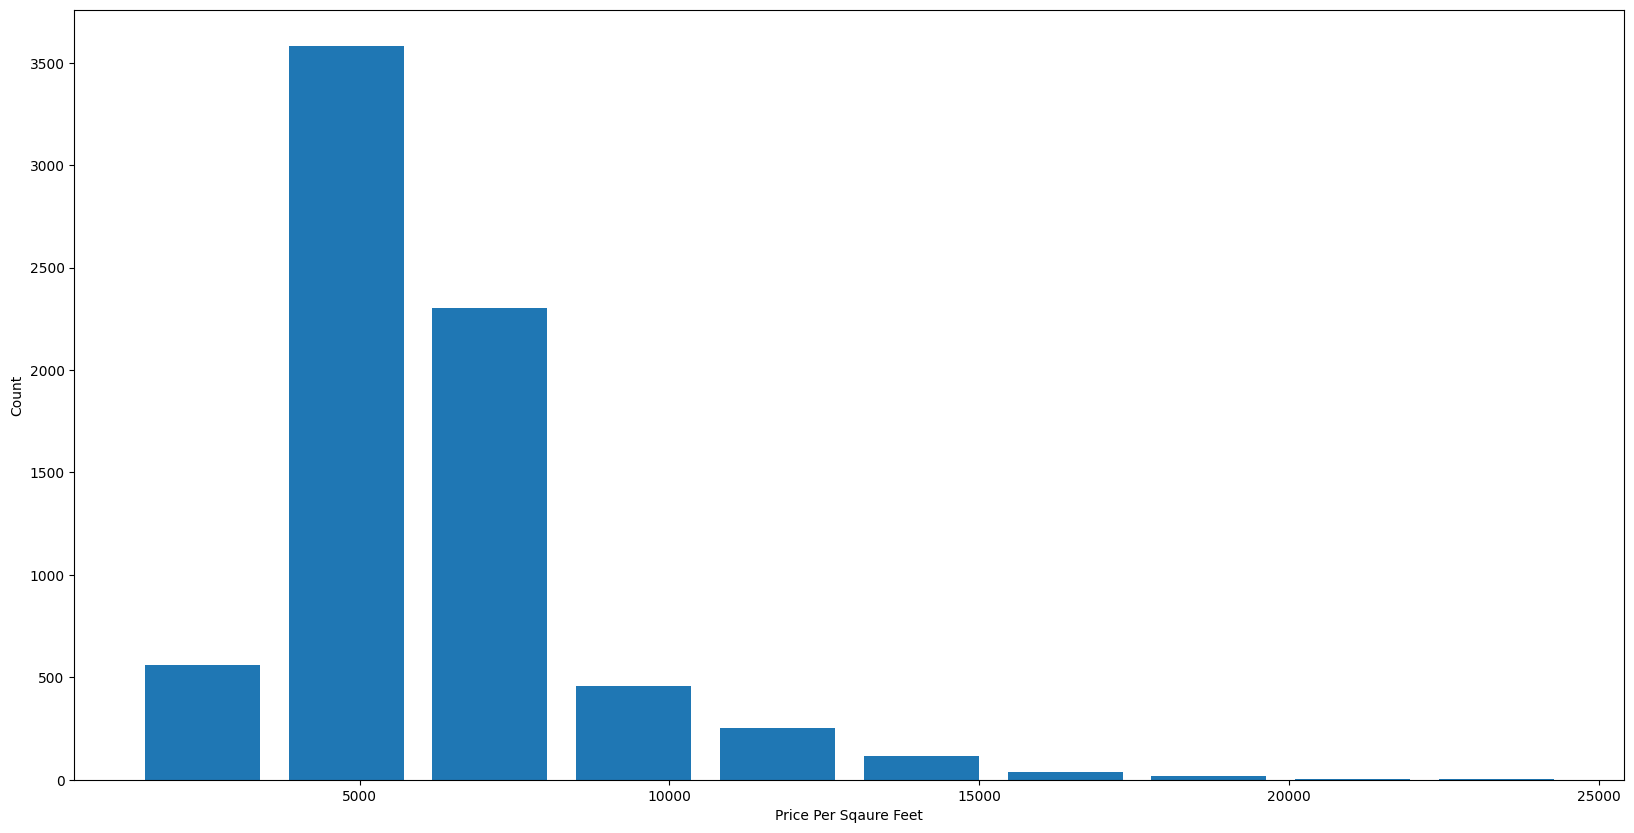

In [41]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Sqaure Feet")
plt.ylabel("Count")

#Outlier Removal Using Bathrooms Feature

In [42]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

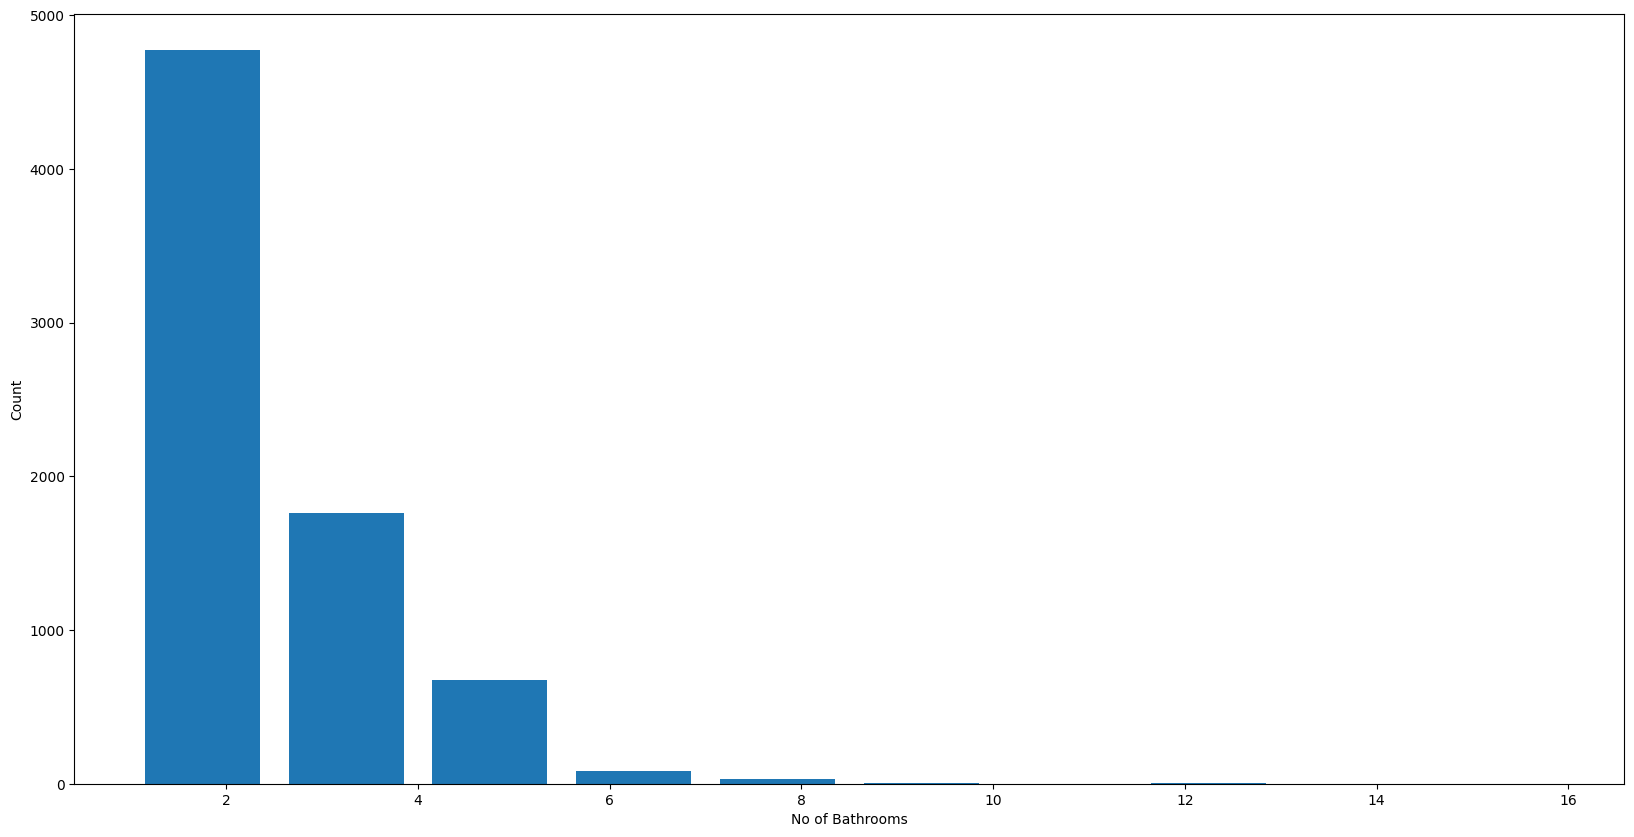

In [103]:
plt.hist(df7.bath,rwidth = 0.8)
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")

In [44]:
#Checking bathrooms greater than 10
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8478,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8567,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9307,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [45]:
#For every bhk there is bhk+2 bathrooms
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7253, 7)

In [47]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [48]:
df9 = df8.drop(['size','price_per_sqft'],axis = 1)
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


#We use One Hot Encoding for location

In [51]:
dummies = pd.get_dummies(df9.location).astype(int)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df10 = pd.concat([df9,dummies.drop('other',axis = 1)],axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df11 = df10.drop('location',axis = 1)
df11.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Build a Model

In [54]:
df11.shape

(7253, 244)

In [55]:
x = df11.drop(['price'],axis = 1)
y = df11.price

In [56]:
print("X Shape : ",x.shape)
print("Y Shape : ",y.shape)

X Shape :  (7253, 243)
Y Shape :  (7253,)


In [57]:
print("Length of x : ",len(x))
print("Length of y : ",len(y))

Length of x :  7253
Length of y :  7253


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7780866051090758

#Use K Fold cross validation to measure accuracy of our LinearRegression Model

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

#Find best model using GridSearchCV


In [72]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
  algos = {
      'linear_regression' : {
          'model' : LinearRegression(),
          'params' : {
              'fit_intercept' : [True,False] #True :- calculate bias term ,False :- not calculate the intercept,used when data already around the origin
          }
      },
      'lasso':{
          'model' : Lasso(),
          'params':{
              'alpha' : [1,2],#More alpha -> More Regularization, Coefficient are pushed more towards zero
              'selection' : ['random','cyclic']
          }
      },
      'decision_tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['mse','friedman_mse'], #Fridman_mse ->more useful when there is non-linear relationship
              'splitter' : ['best','random']#best :- selecct the best feature and threshold to split on
              #random :- select a random feature and threshold to split on.This can help in creating more varied trees,useful
                        #in ensemble methods like Random Forests
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(x,y)
      scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.848683,{'fit_intercept': False}
1,lasso,0.709026,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.754291,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#Test The Model

In [83]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [79]:
np.where(x.columns == "1st Phase JP Nagar")[0][0]

5

In [97]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(x.columns == location)[0][0]

  x1 = np.zeros(len(x.columns))
  x1[0] = sqft
  x1[1] = bath
  x1[2] = bhk
  if loc_index >=0:
    x1[loc_index] = 1

  return lr_clf.predict([x1])[0]

In [98]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.11865848078273

In [99]:
import warnings
warnings.filterwarnings('ignore')
predict_price('1st Phase JP Nagar',1000, 4, 3)

91.09960528209686